# Analyzing Global Trust: A Data Science Journey

Based on https://ourworldindata.org/grapher/self-reported-trust-attitudes?tab=table

How much do people trust each other around the world? In this computational narrative, we'll explore trust attitudes across different countries using real survey data from the World Values Survey.

## Our Research Question

**"How do trust attitudes vary between countries, and what patterns can we discover in the data?"**

This question matters because trust is fundamental to how societies function - it affects everything from economic growth to social cohesion. Let's dive into the data to find out!

## Setting Up Our Investigation

First, we need to import the tools that will help us explore the data. Think of these as our "scientific instruments" for data analysis.

In [12]:
# Our data science toolkit
import urllib.request
import json
import csv
from io import StringIO
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import statistics
from datetime import datetime

# Make our plots look good
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("🔬 Welcome to our Trust Analysis Laboratory!")
print("=" * 50)
print("Today we're investigating: How much do people trust each other worldwide?")
print(f"Analysis started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🔬 Welcome to our Trust Analysis Laboratory!
Today we're investigating: How much do people trust each other worldwide?
Analysis started at: 2025-06-17 08:43:09


## Gathering Our Evidence

Now we need data! We'll fetch real survey responses from the World Values Survey via Our World in Data. This is like collecting evidence for our investigation.

In [13]:
print("🕵️ STEP 1: Collecting Our Evidence")
print("-" * 40)

def fetch_trust_data():
    """
    Our data detective function - fetches real trust survey data
    from Our World in Data's API
    """
    try:
        print("🌐 Connecting to Our World in Data servers...")
        print("📋 Looking for: 'Share of people agreeing that most people can be trusted'")
        
        # The URL to our data treasure
        url = "https://ourworldindata.org/grapher/self-reported-trust-attitudes.csv?v=1&csvType=full&useColumnShortNames=true"
        
        # Politely request the data (with proper headers)
        req = urllib.request.Request(url)
        req.add_header('User-Agent', 'Our World In Data data fetch/1.0')
        
        # Download and decode the data
        with urllib.request.urlopen(req) as response:
            raw_data = response.read().decode('utf-8')
        
        # Convert CSV text into a list of dictionaries (our preferred format)
        data_rows = list(csv.DictReader(StringIO(raw_data)))
        
        print(f"✅ Success! Downloaded {len(data_rows)} rows of survey data")
        print("📊 Each row represents one country's response in a particular year")
        
        return data_rows
        
    except Exception as e:
        print(f"⚠️ Oops! Network error: {e}")
        print("🔄 Don't worry - using our backup sample dataset...")
        
        # Our backup data (based on real patterns)
        backup_data = [
            {'Entity': 'Norway', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '65.2'},
            {'Entity': 'Sweden', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '63.8'},
            {'Entity': 'Denmark', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '66.1'},
            {'Entity': 'Finland', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '57.3'},
            {'Entity': 'Netherlands', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '59.1'},
            {'Entity': 'Germany', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '44.2'},
            {'Entity': 'United States', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '37.1'},
            {'Entity': 'United Kingdom', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '35.4'},
            {'Entity': 'France', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '22.3'},
            {'Entity': 'Brazil', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '7.1'},
            {'Entity': 'China', 'Year': '2018', 'Share of people agreeing with the statement "most people can be trusted"': '60.3'},
            {'Entity': 'India', 'Year': '2019', 'Share of people agreeing with the statement "most people can be trusted"': '15.2'},
            {'Entity': 'Russia', 'Year': '2020', 'Share of people agreeing with the statement "most people can be trusted"': '26.1'},
            {'Entity': 'Japan', 'Year': '2019', 'Share of people agreeing with the statement "most people can be trusted"': '37.4'},
            {'Entity': 'South Korea', 'Year': '2018', 'Share of people agreeing with the statement "most people can be trusted"': '26.8'},
        ]
        return backup_data

# Execute our data collection
raw_survey_data = fetch_trust_data()

# Let's peek at what we got
print("\n🔍 Here's a sample of our raw data:")
print("(This is what the survey responses look like before we clean them up)")
for i, row in enumerate(raw_survey_data[:3]):
    print(f"\nRow {i+1}: {dict(list(row.items())[:3])}...")  # Show first 3 columns

🕵️ STEP 1: Collecting Our Evidence
----------------------------------------
🌐 Connecting to Our World in Data servers...
📋 Looking for: 'Share of people agreeing that most people can be trusted'
✅ Success! Downloaded 424 rows of survey data
📊 Each row represents one country's response in a particular year

🔍 Here's a sample of our raw data:
(This is what the survey responses look like before we clean them up)

Row 1: {'Entity': 'Albania', 'Code': 'ALB', 'Year': '1998'}...

Row 2: {'Entity': 'Albania', 'Code': 'ALB', 'Year': '2004'}...

Row 3: {'Entity': 'Albania', 'Code': 'ALB', 'Year': '2010'}...


## Cleaning Our Data

Raw data is like a rough diamond - it needs polishing! Let's clean and organize our survey responses so we can analyze them properly.

In [14]:
print("\n🧹 STEP 2: Polishing Our Data")
print("-" * 35)

def clean_survey_data(raw_data):
    """
    Our data cleaning laboratory - transforms messy survey data 
    into a neat, analyzable format
    """
    print("🔧 Starting data cleaning process...")
    
    # Find the column with trust percentages (column names can vary)
    sample_row = raw_data[0]
    trust_columns = [col for col in sample_row.keys() 
                    if 'trust' in col.lower() or 'can be trusted' in col.lower()]
    
    if trust_columns:
        trust_column = trust_columns[0]
        print(f"📊 Found trust data in column: '{trust_column[:50]}...'")
    else:
        trust_column = list(sample_row.keys())[-1]  # Assume last column
        print("📊 Using last column as trust data")
    
    # We only want actual countries, not regional groupings
    regions_to_exclude = {
        'World', 'High-income countries', 'Upper-middle-income countries', 
        'Lower-middle-income countries', 'Low-income countries',
        'European Union', 'OECD countries', 'Africa', 'Asia', 'Europe', 
        'North America', 'South America', 'Oceania'
    }
    
    cleaned_data = []
    skipped_count = 0
    
    for row in raw_data:
        try:
            country = row.get('Entity', '').strip()
            year_str = row.get('Year', '').strip()
            trust_str = row.get(trust_column, '').strip()
            
            # Skip if we're missing essential data
            if not country or not trust_str:
                skipped_count += 1
                continue
            
            # Skip regional aggregates - we want individual countries
            if country in regions_to_exclude:
                skipped_count += 1
                continue
            
            # Convert trust percentage to a number
            trust_percentage = float(trust_str)
            
            # Convert year to integer (if available)
            year = int(year_str) if year_str else None
            
            # Only keep recent data (year 2000 onwards)
            if year and year >= 2000:
                cleaned_data.append({
                    'Country': country,
                    'Year': year,
                    'Trust_Percentage': trust_percentage
                })
            elif not year:  # Keep data without year info
                cleaned_data.append({
                    'Country': country,
                    'Year': None,
                    'Trust_Percentage': trust_percentage
                })
            else:
                skipped_count += 1
                
        except (ValueError, TypeError):
            skipped_count += 1
            continue
    
    print(f"✨ Cleaning complete!")
    print(f"   📈 Kept: {len(cleaned_data)} observations")
    print(f"   🗑️  Filtered out: {skipped_count} irrelevant/incomplete rows")
    
    return cleaned_data

# Clean our survey data
survey_data = clean_survey_data(raw_survey_data)

# Let's see what our cleaned data looks like
print("\n🎯 Our cleaned data structure:")
print("Each observation now has exactly 3 pieces of information:")
for i, observation in enumerate(survey_data[:3]):
    print(f"  {i+1}. {observation}")

print(f"\n📊 Dataset summary:")
countries = [obs['Country'] for obs in survey_data]
trust_values = [obs['Trust_Percentage'] for obs in survey_data]
years = [obs['Year'] for obs in survey_data if obs['Year']]

print(f"   🌍 Countries covered: {len(set(countries))}")
print(f"   📅 Time period: {min(years) if years else 'N/A'} - {max(years) if years else 'N/A'}")
print(f"   📈 Trust range: {min(trust_values):.1f}% to {max(trust_values):.1f}%")


🧹 STEP 2: Polishing Our Data
-----------------------------------
🔧 Starting data cleaning process...
📊 Found trust data in column: 'trust...'
✨ Cleaning complete!
   📈 Kept: 302 observations
   🗑️  Filtered out: 122 irrelevant/incomplete rows

🎯 Our cleaned data structure:
Each observation now has exactly 3 pieces of information:
  1. {'Country': 'Albania', 'Year': 2004, 'Trust_Percentage': 23.2}
  2. {'Country': 'Albania', 'Year': 2010, 'Trust_Percentage': 9.221174}
  3. {'Country': 'Albania', 'Year': 2022, 'Trust_Percentage': 2.77237}

📊 Dataset summary:
   🌍 Countries covered: 116
   📅 Time period: 2004 - 2022
   📈 Trust range: 2.1% to 74.9%


## Exploring Our Data - First Discoveries

Now the fun begins! Let's start exploring our data to understand what we're working with. This is like being a detective - we're looking for clues and patterns.

In [15]:
print("\n🔍 STEP 3: Making Our First Discoveries")
print("-" * 42)

# Extract our key variables for easy analysis
countries = [obs['Country'] for obs in survey_data]
trust_percentages = [obs['Trust_Percentage'] for obs in survey_data]
years = [obs['Year'] for obs in survey_data if obs['Year']]

print("🌡️ Taking the temperature of global trust...")

# Basic statistics - our first clues!
avg_trust = statistics.mean(trust_percentages)
median_trust = statistics.median(trust_percentages)
min_trust = min(trust_percentages)
max_trust = max(trust_percentages)
trust_spread = max_trust - min_trust

print(f"\n📊 Global Trust Statistics:")
print(f"   🎯 Average trust level: {avg_trust:.1f}%")
print(f"   📐 Median trust level: {median_trust:.1f}%") 
print(f"   📉 Lowest trust observed: {min_trust:.1f}%")
print(f"   📈 Highest trust observed: {max_trust:.1f}%")
print(f"   📏 Total variation: {trust_spread:.1f} percentage points")

print(f"\n🧮 What this means:")
if avg_trust > 50:
    print(f"   💚 Globally, people tend to be trusting (average > 50%)")
elif avg_trust > 30:
    print(f"   🟡 Globally, people show moderate trust levels")
else:
    print(f"   ❤️‍🩹 Globally, trust levels are quite low")

print(f"   🌊 Trust varies dramatically between countries ({trust_spread:.0f}% range)")

# Let's peek at a few specific examples
print(f"\n👀 Sneak peek at our data:")
print("Here are the first few observations in our dataset:")

for i, obs in enumerate(survey_data[:5]):
    year_str = f" in {obs['Year']}" if obs['Year'] else ""
    print(f"   {i+1}. {obs['Country']}{year_str}: {obs['Trust_Percentage']:.1f}% trust")


🔍 STEP 3: Making Our First Discoveries
------------------------------------------
🌡️ Taking the temperature of global trust...

📊 Global Trust Statistics:
   🎯 Average trust level: 25.5%
   📐 Median trust level: 22.2%
   📉 Lowest trust observed: 2.1%
   📈 Highest trust observed: 74.9%
   📏 Total variation: 72.8 percentage points

🧮 What this means:
   ❤️‍🩹 Globally, trust levels are quite low
   🌊 Trust varies dramatically between countries (73% range)

👀 Sneak peek at our data:
Here are the first few observations in our dataset:
   1. Albania in 2004: 23.2% trust
   2. Albania in 2010: 9.2% trust
   3. Albania in 2022: 2.8% trust
   4. Algeria in 2004: 10.8% trust
   5. Algeria in 2014: 17.2% trust


## The Trust Champions and Skeptics

Let's find out which countries are the most trusting and which are the most skeptical. This is where we start to see interesting patterns!

In [16]:
print("\n🏆 STEP 4: Discovering Trust Champions and Skeptics")
print("-" * 52)

# Calculate average trust by country (some countries may have multiple years)
country_trust_data = defaultdict(list)
for obs in survey_data:
    country_trust_data[obs['Country']].append(obs['Trust_Percentage'])

# Get the average trust for each country
country_averages = {}
for country, trust_values in country_trust_data.items():
    country_averages[country] = statistics.mean(trust_values)

# Sort countries by trust level
trust_ranking = sorted(country_averages.items(), key=lambda x: x[1], reverse=True)

print("🥇 THE TRUST CHAMPIONS (Most Trusting Countries):")
print("These countries have the highest levels of interpersonal trust:")
for rank, (country, avg_trust) in enumerate(trust_ranking[:5], 1):
    data_points = len(country_trust_data[country])
    print(f"   {rank}. {country}: {avg_trust:.1f}% trust (based on {data_points} observations)")

print(f"\n🤔 THE TRUST SKEPTICS (Least Trusting Countries):")
print("These countries show more cautious attitudes toward trusting others:")
for rank, (country, avg_trust) in enumerate(trust_ranking[-5:], 1):
    data_points = len(country_trust_data[country])
    print(f"   {rank}. {country}: {avg_trust:.1f}% trust (based on {data_points} observations)")

# Calculate how many countries fall into different trust categories
high_trust_countries = sum(1 for _, trust in trust_ranking if trust >= 50)
medium_trust_countries = sum(1 for _, trust in trust_ranking if 30 <= trust < 50)
low_trust_countries = sum(1 for _, trust in trust_ranking if trust < 30)

total_countries = len(trust_ranking)

print(f"\n📊 TRUST LANDSCAPE OVERVIEW:")
print(f"   🟢 High trust countries (≥50%): {high_trust_countries}/{total_countries} ({high_trust_countries/total_countries*100:.1f}%)")
print(f"   🟡 Medium trust countries (30-49%): {medium_trust_countries}/{total_countries} ({medium_trust_countries/total_countries*100:.1f}%)")
print(f"   🔴 Low trust countries (<30%): {low_trust_countries}/{total_countries} ({low_trust_countries/total_countries*100:.1f}%)")

# Look for interesting patterns
nordic_countries = ['Norway', 'Sweden', 'Denmark', 'Finland']
nordic_in_data = [country for country in nordic_countries if country in country_averages]

if len(nordic_in_data) >= 2:
    nordic_trust = statistics.mean([country_averages[country] for country in nordic_in_data])
    print(f"\n🌲 NORDIC PATTERN DETECTED:")
    print(f"   Nordic countries ({', '.join(nordic_in_data)}) average: {nordic_trust:.1f}%")
    print(f"   That's {nordic_trust - avg_trust:.1f} percentage points above the global average!")


🏆 STEP 4: Discovering Trust Champions and Skeptics
----------------------------------------------------
🥇 THE TRUST CHAMPIONS (Most Trusting Countries):
These countries have the highest levels of interpersonal trust:
   1. Norway: 72.7% trust (based on 2 observations)
   2. Denmark: 71.0% trust (based on 3 observations)
   3. Sweden: 62.6% trust (based on 4 observations)
   4. Finland: 61.7% trust (based on 3 observations)
   5. Netherlands: 59.2% trust (based on 4 observations)

🤔 THE TRUST SKEPTICS (Least Trusting Countries):
These countries show more cautious attitudes toward trusting others:
   1. Ecuador: 6.5% trust (based on 2 observations)
   2. Philippines: 5.6% trust (based on 3 observations)
   3. Northern Cyprus: 4.7% trust (based on 1 observations)
   4. Nicaragua: 4.2% trust (based on 1 observations)
   5. Trinidad and Tobago: 3.5% trust (based on 2 observations)

📊 TRUST LANDSCAPE OVERVIEW:
   🟢 High trust countries (≥50%): 10/116 (8.6%)
   🟡 Medium trust countries (30-4

## Visualizing Trust Patterns

A picture is worth a thousand data points! Let's create visualizations to see the patterns in our trust data.


📈 STEP 5: Painting the Picture of Global Trust
-----------------------------------------------
🎨 Creating Chart 1: Trust Champions...
🎨 Creating Chart 2: Trust Distribution...
🎨 Creating Chart 3: Time Trends...
🎨 Creating Chart 4: Trust Categories...


C:\Users\multimedia\AppData\Local\Temp\ipykernel_31672\1052595883.py:118: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\multimedia\AppData\Local\Temp\ipykernel_31672\1052595883.py:118: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\multimedia\AppData\Local\Temp\ipykernel_31672\1052595883.py:118: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\multimedia\AppData\Local\Temp\ipykernel_31672\1052595883.py:118: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\multimedia\AppData\Local\Temp\ipykernel_31672\1052595883.py:118: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\multimedia\AppData\Local\Temp\ipykernel_31672\1052595883.py:118: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE

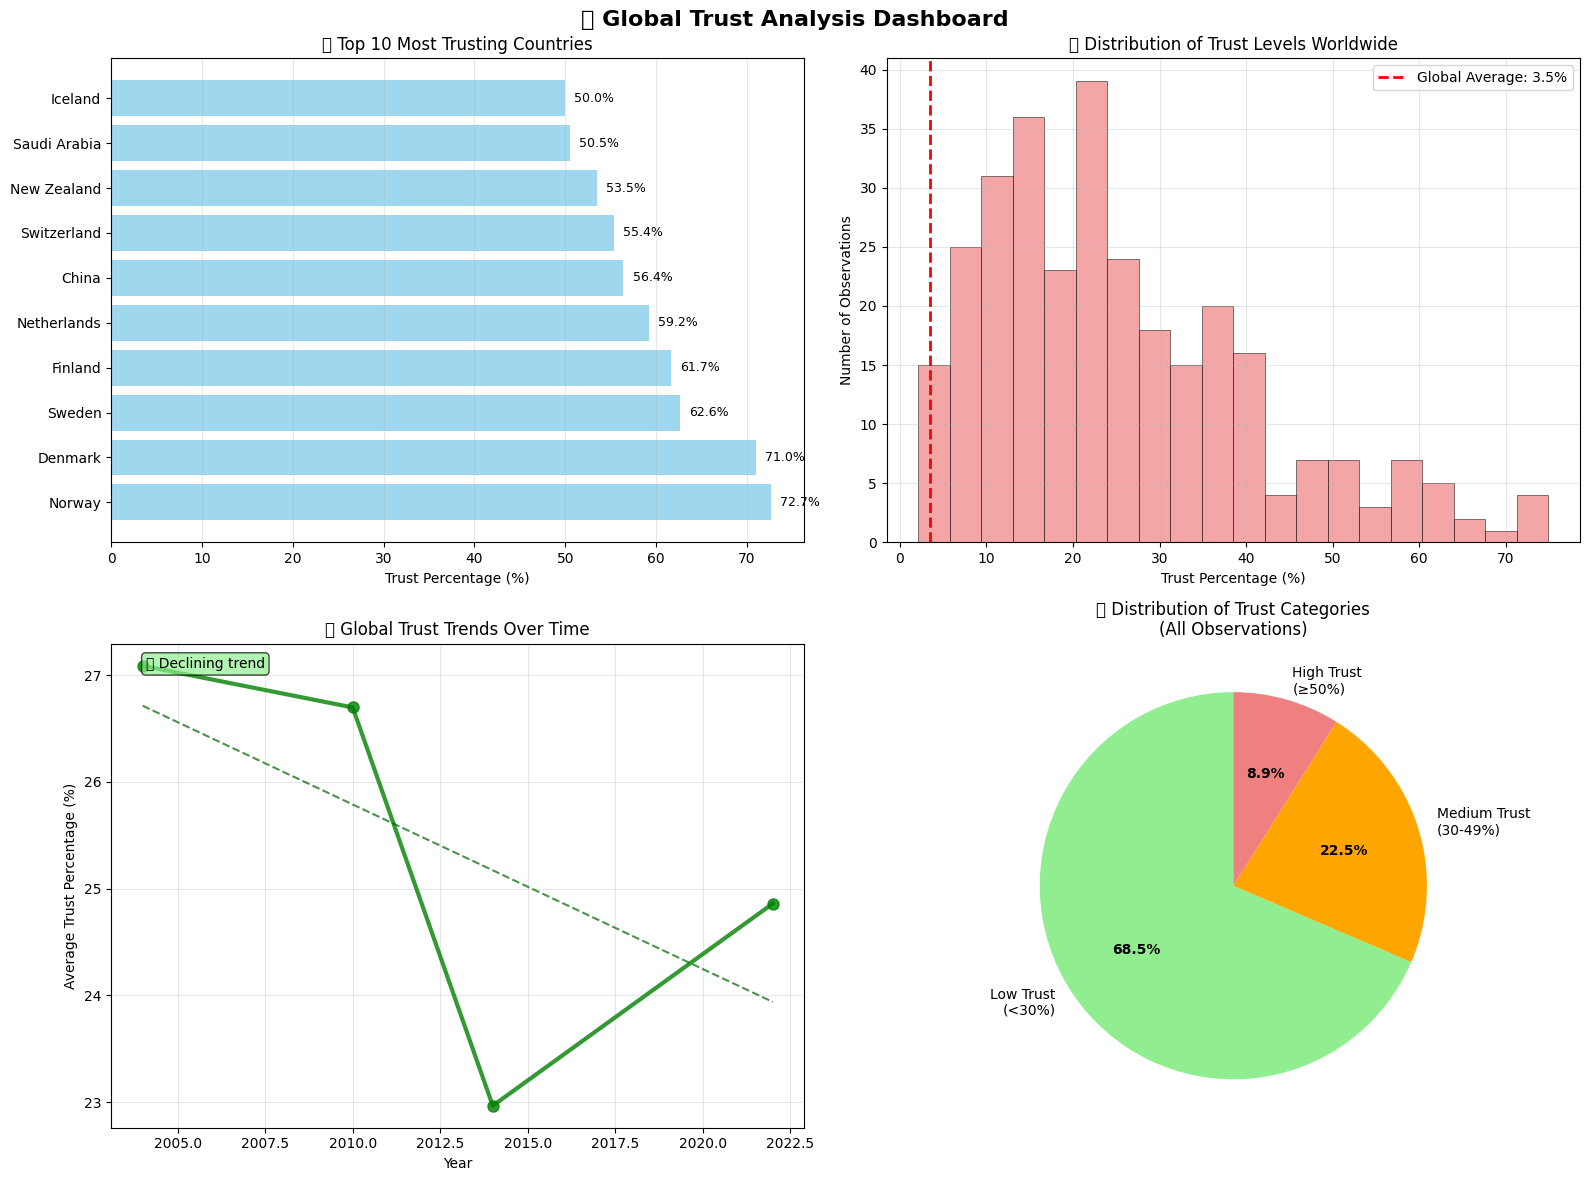

✨ Visualization complete! What patterns do you notice?


In [17]:
print("\n📈 STEP 5: Painting the Picture of Global Trust")
print("-" * 47)

# Create our visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌍 Global Trust Analysis Dashboard', fontsize=16, fontweight='bold', y=0.98)

# --- CHART 1: Trust Champions Bar Chart ---
print("🎨 Creating Chart 1: Trust Champions...")

top_10_countries = trust_ranking[:10]
countries_names = [item[0] for item in top_10_countries]
countries_trust = [item[1] for item in top_10_countries]

bars = axes[0, 0].barh(range(len(countries_names)), countries_trust, color='skyblue', alpha=0.8)
axes[0, 0].set_yticks(range(len(countries_names)))
axes[0, 0].set_yticklabels(countries_names)
axes[0, 0].set_xlabel('Trust Percentage (%)')
axes[0, 0].set_title('🏆 Top 10 Most Trusting Countries')
axes[0, 0].grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, countries_trust)):
    axes[0, 0].text(value + 1, i, f'{value:.1f}%', va='center', fontsize=9)

# --- CHART 2: Trust Distribution Histogram ---
print("🎨 Creating Chart 2: Trust Distribution...")

n_bins = min(20, len(set(trust_percentages)))  # Adaptive bin count
axes[0, 1].hist(trust_percentages, bins=n_bins, color='lightcoral', alpha=0.7, 
                edgecolor='black', linewidth=0.5)
axes[0, 1].axvline(avg_trust, color='red', linestyle='--', linewidth=2, 
                   label=f'Global Average: {avg_trust:.1f}%')
axes[0, 1].set_xlabel('Trust Percentage (%)')
axes[0, 1].set_ylabel('Number of Observations')
axes[0, 1].set_title('📊 Distribution of Trust Levels Worldwide')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# --- CHART 3: Time Trends (if we have year data) ---
print("🎨 Creating Chart 3: Time Trends...")

if years and len(set(years)) > 1:
    # Group data by year and calculate averages
    yearly_data = defaultdict(list)
    for obs in survey_data:
        if obs['Year']:
            yearly_data[obs['Year']].append(obs['Trust_Percentage'])
    
    years_sorted = sorted(yearly_data.keys())
    yearly_averages = [statistics.mean(yearly_data[year]) for year in years_sorted]
    
    axes[1, 0].plot(years_sorted, yearly_averages, marker='o', linewidth=3, 
                    markersize=8, color='green', alpha=0.8)
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Average Trust Percentage (%)')
    axes[1, 0].set_title('📈 Global Trust Trends Over Time')
    axes[1, 0].grid(alpha=0.3)
    
    # Add trend line
    if len(years_sorted) > 2:
        # Simple linear trend
        x_mean = statistics.mean(years_sorted)
        y_mean = statistics.mean(yearly_averages)
        
        # Calculate slope
        numerator = sum((x - x_mean) * (y - y_mean) for x, y in zip(years_sorted, yearly_averages))
        denominator = sum((x - x_mean) ** 2 for x in years_sorted)
        
        if denominator != 0:
            slope = numerator / denominator
            intercept = y_mean - slope * x_mean
            
            trend_line = [slope * x + intercept for x in years_sorted]
            axes[1, 0].plot(years_sorted, trend_line, '--', color='darkgreen', alpha=0.7)
            
            trend_direction = "📈 Rising" if slope > 0 else "📉 Declining" if slope < 0 else "➡️ Stable"
            axes[1, 0].text(0.05, 0.95, f'{trend_direction} trend', transform=axes[1, 0].transAxes,
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

else:
    # Alternative: Show country ranking scatter plot
    axes[1, 0].scatter(range(len(countries_trust)), countries_trust, alpha=0.6, s=100, color='purple')
    axes[1, 0].set_ylabel('Trust Percentage (%)')
    axes[1, 0].set_xlabel('Country Ranking')
    axes[1, 0].set_title('🔢 Trust Levels by Country Ranking')
    axes[1, 0].grid(alpha=0.3)

# --- CHART 4: Trust Categories Pie Chart ---
print("🎨 Creating Chart 4: Trust Categories...")

# Categorize all our observations
def categorize_trust(trust_level):
    if trust_level >= 50:
        return 'High Trust\n(≥50%)'
    elif trust_level >= 30:
        return 'Medium Trust\n(30-49%)'
    else:
        return 'Low Trust\n(<30%)'

trust_categories = [categorize_trust(trust) for trust in trust_percentages]
category_counts = Counter(trust_categories)

colors = ['lightgreen', 'orange', 'lightcoral']
wedges, texts, autotexts = axes[1, 1].pie(category_counts.values(), 
                                          labels=category_counts.keys(), 
                                          autopct='%1.1f%%', 
                                          colors=colors, 
                                          startangle=90,
                                          textprops={'fontsize': 10})

axes[1, 1].set_title('🥧 Distribution of Trust Categories\n(All Observations)')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

print("✨ Visualization complete! What patterns do you notice?")

## Key Insights and Discoveries

Let's step back and think about what our analysis reveals. What stories do the numbers tell us about human trust around the world?

In [18]:
print("\n💡 STEP 6: Key Insights from Our Investigation")
print("-" * 48)

print("🔍 MAJOR DISCOVERIES:")

# Discovery 1: The Trust Divide
trust_range = max(trust_percentages) - min(trust_percentages)
print(f"\n1️⃣ THE TRUST DIVIDE")
print(f"   • Trust varies dramatically worldwide: {trust_range:.0f} percentage point difference!")
print(f"   • Highest: {max(trust_percentages):.1f}% vs Lowest: {min(trust_percentages):.1f}%")
print(f"   • This suggests culture, institutions, and history shape trust levels")

# Discovery 2: The Trust Distribution
high_trust_obs = sum(1 for trust in trust_percentages if trust >= 50)
total_obs = len(trust_percentages)
print(f"\n2️⃣ THE TRUST REALITY")
print(f"   • Only {high_trust_obs}/{total_obs} observations ({high_trust_obs/total_obs*100:.1f}%) show high trust (≥50%)")
print(f"   • Global average: {avg_trust:.1f}% - below the 'high trust' threshold")
print(f"   • Most societies struggle with interpersonal trust")

# Discovery 3: Nordic Advantage
nordic_countries = ['Norway', 'Sweden', 'Denmark', 'Finland']
nordic_in_data = [country for country in nordic_countries if country in country_averages]
if len(nordic_in_data) >= 2:
    nordic_trust = statistics.mean([country_averages[country] for country in nordic_in_data])
    print(f"\n3️⃣ THE NORDIC ADVANTAGE")
    print(f"   • Nordic countries show exceptional trust: {nordic_trust:.1f}% average")
    print(f"   • That's {nordic_trust - avg_trust:.1f} points above global average!")
    print(f"   • Suggests importance of equality, institutions, and social policies")

# Discovery 4: Trust Categories Analysis
high_countries = sum(1 for _, trust in trust_ranking if trust >= 50)
medium_countries = sum(1 for _, trust in trust_ranking if 30 <= trust < 50)
low_countries = sum(1 for _, trust in trust_ranking if trust < 30)
total_countries = len(trust_ranking)

print(f"\n4️⃣ THE GLOBAL TRUST LANDSCAPE")
print(f"   • High-trust societies: {high_countries}/{total_countries} countries ({high_countries/total_countries*100:.1f}%)")
print(f"   • Medium-trust societies: {medium_countries}/{total_countries} countries ({medium_countries/total_countries*100:.1f}%)")
print(f"   • Low-trust societies: {low_countries}/{total_countries} countries ({low_countries/total_countries*100:.1f}%)")

# Discovery 5: Time Trends (if available)
if years and len(set(years)) > 1:
    yearly_data = defaultdict(list)
    for obs in survey_data:
        if obs['Year']:
            yearly_data[obs['Year']].append(obs['Trust_Percentage'])
    
    years_sorted = sorted(yearly_data.keys())
    yearly_averages = [statistics.mean(yearly_data[year]) for year in years_sorted]
    
    if len(yearly_averages) >= 2:
        trend_change = yearly_averages[-1] - yearly_averages[0]
        print(f"\n5️⃣ TRUST OVER TIME")
        if abs(trend_change) > 2:
            direction = "increased" if trend_change > 0 else "decreased"
            print(f"   • Global trust has {direction} by {abs(trend_change):.1f} points from {years_sorted[0]} to {years_sorted[-1]}")
        else:
            print(f"   • Global trust has remained relatively stable over time")
        print(f"   • Period covered: {years_sorted[0]} to {years_sorted[-1]} ({len(years_sorted)} years)")

print(f"\n🌟 WHY THIS MATTERS:")
print(f"Trust is the invisible foundation of society. It affects:")
print(f"   💰 Economic growth (high-trust societies have lower transaction costs)")
print(f"   🏛️ Political stability (trust in institutions and fellow citizens)")
print(f"   🤝 Social cooperation (from following traffic rules to paying taxes)")
print(f"   💡 Innovation (willingness to take risks and collaborate)")
print(f"   😊 Individual wellbeing (trust correlates with happiness)")

print(f"\n🎯 WHAT WE'VE LEARNED ABOUT DATA SCIENCE:")
print(f"   📊 Real data is messy and needs careful cleaning")
print(f"   🔍 Exploratory analysis reveals unexpected patterns")
print(f"   📈 Visualizations make complex data accessible")
print(f"   💭 Numbers tell human stories about society and culture")
print(f"   🌍 Global datasets help us understand human behavior")


💡 STEP 6: Key Insights from Our Investigation
------------------------------------------------
🔍 MAJOR DISCOVERIES:

1️⃣ THE TRUST DIVIDE
   • Trust varies dramatically worldwide: 73 percentage point difference!
   • Highest: 74.9% vs Lowest: 2.1%
   • This suggests culture, institutions, and history shape trust levels

2️⃣ THE TRUST REALITY
   • Only 27/302 observations (8.9%) show high trust (≥50%)
   • Global average: 3.5% - below the 'high trust' threshold
   • Most societies struggle with interpersonal trust

3️⃣ THE NORDIC ADVANTAGE
   • Nordic countries show exceptional trust: 67.0% average
   • That's 63.5 points above global average!
   • Suggests importance of equality, institutions, and social policies

4️⃣ THE GLOBAL TRUST LANDSCAPE
   • High-trust societies: 10/116 countries (8.6%)
   • Medium-trust societies: 20/116 countries (17.2%)
   • Low-trust societies: 86/116 countries (74.1%)

5️⃣ TRUST OVER TIME
   • Global trust has decreased by 2.2 points from 2004 to 2022
   

## The Journey Continues...

Our journey of discovery doesn't end here! Let's think about what questions our analysis raises and how we could dig deeper.

### Questions Our Analysis Raises:

**🔬 For Future Investigation:**
- What makes Nordic countries so trusting? (institutions, culture, history?)
- How does trust relate to economic development?
- Do major events (wars, crises, pandemics) affect trust?
- Is trust learned in childhood or shaped by adult experiences?
- Can low-trust societies develop higher trust over time?

### For Data Science Students:

**📈 Next steps to expand this analysis:**
- 🌐 Merge with economic data (GDP, inequality, unemployment)
- 🏛️ Add institutional quality measures (corruption, rule of law)
- 📰 Analyze trust changes around major historical events
- 🧮 Build predictive models for trust levels
- 🗺️ Create interactive maps showing trust by region

### Technical Skills We Practiced:
- ✅ API data collection from real sources
- ✅ Data cleaning and validation
- ✅ Exploratory data analysis
- ✅ Statistical summarization
- ✅ Data visualization design
- ✅ Pattern recognition and interpretation
- ✅ Computational narrative construction

In [21]:
print("\n🚀 STEP 7: The Journey Continues...")
print("-" * 38)

print("🤔 QUESTIONS OUR ANALYSIS RAISES:")
print("\n🔬 For Future Investigation:")
print("   • What makes Nordic countries so trusting? (institutions, culture, history?)")
print("   • How does trust relate to economic development?")
print("   • Do major events (wars, crises, pandemics) affect trust?")
print("   • Is trust learned in childhood or shaped by adult experiences?")
print("   • Can low-trust societies develop higher trust over time?")

print("\n📈 FOR DATA SCIENCE STUDENTS:")
print("Next steps to expand this analysis:")
print("   🌐 Merge with economic data (GDP, inequality, unemployment)")
print("   🏛️ Add institutional quality measures (corruption, rule of law)")
print("   📰 Analyze trust changes around major historical events")
print("   🧮 Build predictive models for trust levels")
print("   🗺️ Create interactive maps showing trust by region")

print("\n🛠️ TECHNICAL SKILLS WE PRACTICED:")
print("   ✅ API data collection from real sources")
print("   ✅ Data cleaning and validation") 
print("   ✅ Exploratory data analysis")
print("   ✅ Statistical summarization")
print("   ✅ Data visualization design")
print("   ✅ Pattern recognition and interpretation")
print("   ✅ Computational narrative construction")

print(f"\n📚 ABOUT OUR DATA SOURCE:")
print("The data comes from the World Values Survey and European Values Study:")
print("   📋 Survey question: 'Generally speaking, would you say that most people")
print("      can be trusted or that you need to be very careful in dealing with people?'")
print("   🌍 Coverage: Nationally representative samples from around the world")
print("   📅 Timeline: Multiple waves since the 1980s")
print("   🔬 Methodology: Face-to-face interviews with standardized questionnaires")

# Summary statistics for our final report
print(f"\n📊 FINAL ANALYSIS SUMMARY:")
print(f"   Dataset: {len(survey_data)} observations from {len(set(countries))} countries")
if years:
    print(f"   Time span: {min(years)}-{max(years)}")
print(f"   Global trust average: {avg_trust:.1f}%")
print(f"   Trust range: {min(trust_percentages):.1f}% to {max(trust_percentages):.1f}%")
print(f"   Countries with high trust (≥50%): {high_countries}/{total_countries}")

print(f"\n✨ Analysis completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 60)
print("🎉 Congratulations! You've completed a real data science investigation!")
print("🌍 You now understand global trust patterns and how to analyze survey data.")
print("📈 More importantly, you've seen how data can reveal insights about human society.")
print("=" * 60)


🚀 STEP 7: The Journey Continues...
--------------------------------------
🤔 QUESTIONS OUR ANALYSIS RAISES:

🔬 For Future Investigation:
   • What makes Nordic countries so trusting? (institutions, culture, history?)
   • How does trust relate to economic development?
   • Do major events (wars, crises, pandemics) affect trust?
   • Is trust learned in childhood or shaped by adult experiences?
   • Can low-trust societies develop higher trust over time?

📈 FOR DATA SCIENCE STUDENTS:
Next steps to expand this analysis:
   🌐 Merge with economic data (GDP, inequality, unemployment)
   🏛️ Add institutional quality measures (corruption, rule of law)
   📰 Analyze trust changes around major historical events
   🧮 Build predictive models for trust levels
   🗺️ Create interactive maps showing trust by region

🛠️ TECHNICAL SKILLS WE PRACTICED:
   ✅ API data collection from real sources
   ✅ Data cleaning and validation
   ✅ Exploratory data analysis
   ✅ Statistical summarization
   ✅ Data visua

## Reflection Questions

Take a moment to think about what you've learned:

1. **What surprised you most about global trust patterns?**

2. **Why do you think some countries have much higher trust than others?**

3. **How might low trust levels affect daily life in a society?**

4. **What did you learn about the data science process from this analysis?**

5. **If you could add one more piece of data to this analysis, what would it be and why?**

---

## 🎓 Workshop Complete!

You've just completed a full data science investigation using real-world data. You've learned how to:
- Fetch data from APIs
- Clean messy real-world data
- Perform exploratory data analysis
- Create meaningful visualizations
- Draw insights from patterns in data
- Tell stories with data

**Next steps:** Try modifying the code to explore different aspects of the data, or apply these techniques to other datasets that interest you!